# Step 2
Il nostro obiettivo è quello di ricercare il canale raro 
$$q\bar q \rightarrow g \rightarrow t\bar t \rightarrow Wb+Wb \rightarrow l\nu b + l\nu b$$
A tale scopo seguirò i seguenti passaggi:
* L'idea è di ritrovare un segnale all'energia di circa $344 GeV$
    + Ciò è dovuto al fatto che il quark top ha energia di circa $170GeV$
    + Per il nostro segnale, nei dati, sappiamo che il fondo principale è dato dalla risonanza della $Z^0$
        - A causa di ciò consideriamo, prima di poter effettuare i tagli e prima di studiare il dataset d'interesse, i file TTDilep e DYJets rispettivamente come campione di segnale e di fondo così da sapepre come effettuare una selezione
* Procediamo con la selezione e l'analisi del segnale
    + consideriamo solo i casi in cui ho almeno 2 muoni, altrimenti posso già scartare tutto
        - I muoni devono essere passing probes col cut deciso nello step 1 così da avere efficienza del 90%: 
        $$dz <0.014 \qquad dB<0.007 \qquad isoDeposits < 9$$ 
    + Dobbiamo considerare la selezione sui muoni ricavata dallo step 1, fatta col tag&probe
    + Dobbiamo riuscire a capire quanto le variabili che abbiamo siano discriminanti per il fondo. Per farlo utilizziamo:
        - Numero di jets
        - Numero di muoni passing probes
        - dz
        - dB
        - jets energy
        - muon pt
        - jets pt
        - met pt

---
Sto iniziando a analizzare i vari dataset così da riuscire a capire quali sono le caratteristiche sulle quali è possibile fare dei tagli,  

In [3]:
import ROOT as R
import particle as pt
import numpy as np

filett = R.TFile("./datas/TTDilep.root","OPEN")
tttr = filett.trees.events

fileDY = R.TFile("./datas/DYJets.root","OPEN")
dytr = fileDY.trees.events

Warning in <TFile::Append>: Replacing existing TH1: Jet_size (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_size (Potential memory leak).


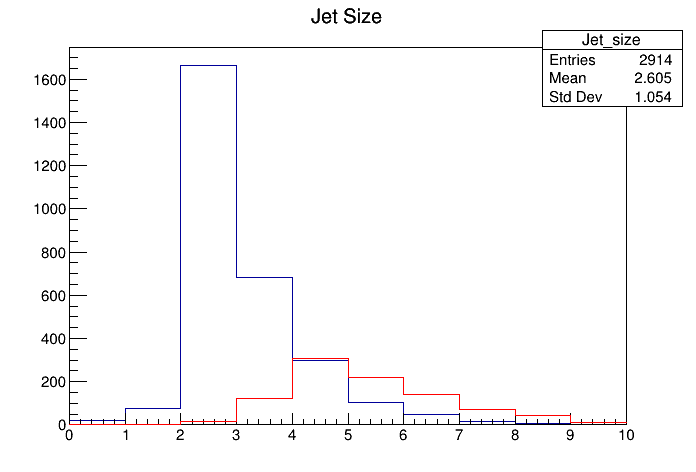

In [19]:
h_tt_jsz=R.TH1F("Jet_size", "Jet Size", 10, 0 , 10)
h_dy_jsz=R.TH1F("Jet_size", "Jet Size", 10, 0 , 10)
c=R.TCanvas()

for i in range(tttr.GetEntries()):
    tttr.GetEntry(i)
    #Inizio varie condizioni sui muoni così comincio con l'ignarare tutti i casi in cui non ricostruisco bene i muoni
    if(tttr.muontracks_size >=2):
        muons = pt.get_collection(tttr, "muontracks")
        for mi in range(len(muons)):
            if(tttr.muontracks_dz[mi]<0.005 and tttr.muontracks_dB[mi]<0.003 and tttr.muontracks_isoDeposits[mi]<4): #Taglio del tag
                for mj in range(len(muons)):
                    if(mi!=mj and tttr.muontracks_dz[mj]<0.014 and tttr.muontracks_dB[mj]<0.007 and tttr.muontracks_isoDeposits[mj]<9): #così sto facendo conteggi doppi, ma non sono sicuro scrivere for mj in range mi sia correttissimo
                        h_tt_jsz.Fill(tttr.jets_size)
                        
for k in range(dytr.GetEntries()):
    dytr.GetEntry(k)
    if(dytr.muontracks_size >=2):
        muons = pt.get_collection(dytr, "muontracks")
        for mi in range(len(muons)):
            if(dytr.muontracks_dz[mi]<0.005 and dytr.muontracks_dB[mi]<0.003 and dytr.muontracks_isoDeposits[mi]<4): #Taglio del tag
                for mj in range(len(muons)):
                    if(mi!=mj and dytr.muontracks_dz[mj]<0.014 and dytr.muontracks_dB[mj]<0.007 and dytr.muontracks_isoDeposits[mj]<9): #così sto facendo conteggi doppi, ma non sono sicuro scrivere for mj in range mi sia correttissimo
                        h_dy_jsz.Fill(dytr.jets_size)
                        
c.Draw()
h_dy_jsz.Draw()
h_tt_jsz.SetLineColor(R.kRed)
h_tt_jsz.Draw("SAME")